<a href="https://colab.research.google.com/github/Rafael-Barbosa/Perceptron_Adaline/blob/main/AMERICANAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evitando o Overffiting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [3]:
from sklearn.preprocessing import MinMaxScaler

## Importando os dados de Treinamento

In [4]:
# import gdown
# !gdown 1BgAUJFeJ1IW81wCcwQ-Hwk81-ZaIvZmZ
# !gdown 1MSRZB9MW_1bv9NPwD6cb7o9mUl1XoGJ2

In [5]:
dataset_treino = pd.read_csv('dados/AMER3.SA-Treinamento.csv')
dataset_treino.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,41.949505,41.967171,41.075191,41.075191,40.058941,671688
1,2010-01-05,41.507931,41.596249,39.768131,40.094894,39.102898,948312
2,2010-01-06,40.174377,40.554134,39.494354,40.536469,39.533546,644626
3,2010-01-07,40.183212,41.481438,39.573837,40.995708,39.981426,903473
4,2010-01-08,41.331303,41.331303,40.015411,40.015411,39.025383,526186


In [6]:
dataset_treino = dataset_treino.dropna()
treino_set = dataset_treino.iloc[:, 1:2].values

In [7]:
dataset_treino.iloc[:, 1:2]

,Open
0,41.949505
1,41.507931
2,40.174377
3,40.183212
4,41.331303
...,...
3220,9.190000
3221,9.210000
3222,9.380000
3223,9.220000


## Dimensionamento dos dados

In [8]:
sc = MinMaxScaler(feature_range = (0, 1))
treino_set_scaled = sc.fit_transform(treino_set)

## Criação de uma estrutura de dados com 20 timesteps e 1 um saída

In [9]:
X_treino = []
y_treino = []
for i in range(20, 3225):
    X_treino.append(treino_set_scaled[i-20:i, 0])
    y_treino.append(treino_set_scaled[i, 0])
X_treino, y_treino = np.array(X_treino), np.array(y_treino)

## Reshaping

In [10]:
X_treino = np.reshape(X_treino, (X_treino.shape[0], X_treino.shape[1], 1))

In [11]:
X_treino.shape[1], 1

(20, 1)

## Inicializa a RNA 
### Um modelo sequencial é apropriado para um conjunto simples de camadas onde cada camada tem exatamente um tensor de entrada e um tensor de saída.

In [12]:
regressor = Sequential()

## Adicionando a primeira camada LSTM (É uma arquitetura de rede neural recorrente) e alguma regularização de Dropout

### O intuito é reduzir o overfitting 

### Dropout Ele consiste em aleatoriamente descartar algumas unidades (neurônios) durante o treinamento de cada época. Isso significa que cada unidade é mantida com uma certa probabilidade (normalmente 60%) e descartada com uma certa probabilidade (40%) -- Em nosso caso.

### A regularização L1, também conhecida como Lasso, adiciona o valor absoluto dos coeficientes do modelo como parte da função de perda a ser otimizada. Isso resulta em uma penalização mais forte dos coeficientes maiores e pode levar à seleção automática de recursos, ou seja, à atribuição de coeficientes próximos a zero a recursos menos importantes.

### A regularização L2, também conhecida como Ridge, adiciona o quadrado dos coeficientes do modelo como parte da função de perda a ser otimizada. Isso resulta em uma penalização mais suave dos coeficientes maiores, mas ainda mantém a estabilidade no modelo e previne o overfitting.

In [13]:
regressor.add(LSTM(units = 70, return_sequences = True, input_shape = (X_treino.shape[1], 1)))
regressor.add(Dropout(0.4))

C:\Users\paulo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Adicionando uma segunda camada de LSTM com Regularização Dropout 

---



In [14]:
regressor.add(LSTM(units = 70, return_sequences = True))
regressor.add(Dropout(0.4))

## Adicionando uma terceira camada de LSTM com Regularização Dropout 


In [15]:
regressor.add(LSTM(units = 70, return_sequences = True))
regressor.add(Dropout(0.4))

## Adicionando uma quarta camada de LSTM com Regularização Dropout

In [16]:
regressor.add(LSTM(units = 70))
regressor.add(Dropout(0.4))

## Adicionando a camada de saída



In [17]:
regressor.add(Dense(units = 1))

## Compilando RNA 
### Utilizando a otimização ADAM: A otimização de Adam é um método de descida gradiente estocástico baseado na estimativa adaptativa de momentos de primeira e segunda ordem.

### A função loss é por meio da média dos quadrados 

### Utilize outros otimizadores: https://keras.io/api/optimizers/

### Utilize outras funções loss: https://keras.io/api/losses/


In [18]:
regressor.compile(optimizer = 'Nadam', loss = 'mean_squared_error')

## Fitting da RNA para treinamento do set

In [19]:
regressor.fit(X_treino, y_treino, epochs = 100, batch_size = 32)

Epoch 1/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0124
Epoch 2/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0026
Epoch 3/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0022
Epoch 4/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0019
Epoch 5/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0020
Epoch 6/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0017
Epoch 7/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0016
Epoch 8/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0018
Epoch 9/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0016
Epoch 10/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0014
Epoch 11/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0016
Epoch 12/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0016
Epoch 13/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0014
Epoch 14/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0013
Epoch 15/100
101/101 ━━━━━━━━

## Obtendo o preço real

In [20]:
dataset_test = pd.read_csv('dados/AMER3.SA-Teste.csv')
real_preco_acao = dataset_test.iloc[:, 1:2].values

## Previsão

In [21]:
dataset_total = pd.concat((dataset_treino['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 20:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(20, 40):
    X_test.append(inputs[i-20:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


## Visualizando

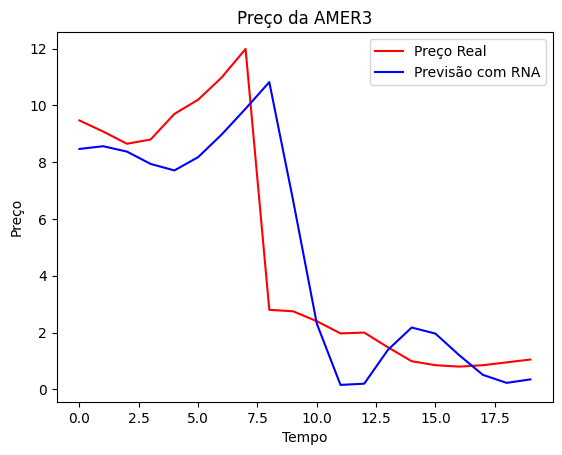

In [22]:
plt.plot(real_preco_acao, color = 'red', label = 'Preço Real')
plt.plot(predicted_stock_price, color = 'blue', label = 'Previsão com RNA')
plt.title('Preço da AMER3')
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.legend()
plt.show()